In [55]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter('ignore')

%matplotlib inline 

import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('../../../../data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#Доля выживших
df['Survived'].mean()

0.3838383838383838

In [71]:
#Доля выживших женщин
df[df['Sex'] == 'female']['Survived'].sum()/df['Survived'].count()

0.2615039281705948

In [73]:
#пол/класс
pd.crosstab(df.Sex, df.Pclass, normalize=False)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [72]:
#Тоже самое, но только совершеннолетние пассажиры(по меркам США)
pd.crosstab(df[df['Age']>21].Sex, df[df['Age']>21].Pclass, normalize=False)


Pclass,1,2,3
Sex,,,
female,69,57,51
male,93,77,163


In [26]:
#Статистика цен относительно пола
numeric = ['Fare']
df.groupby("Sex")[numeric].describe()

Статистика цен относительно пола 


Fare                                                              
        count       mean        std   min        25%   50%    75%       max
Sex                                                                        
female  314.0  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292
male    577.0  25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292

In [74]:
#Средние возраст и цена за билет в зависимости от станции посадки и пола    
df.pivot_table(['Fare', 'Age'], ['Sex', 'Embarked'], aggfunc="median").head()

Age      Fare
Sex    Embarked                
female C         24.0  56.92920
       Q         21.5   7.76875
       S         27.0  24.15000
male   C         30.0  24.00000
       Q         30.0   7.75000

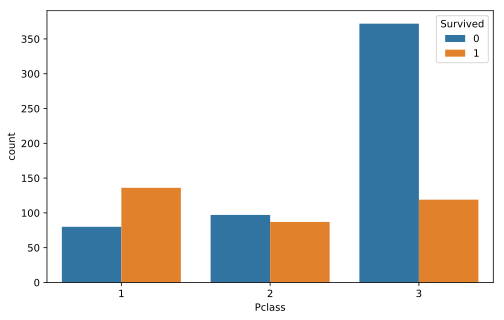

In [75]:
#Статистика по выжившим относительно пола
sns.countplot(x='Pclass', hue='Survived', data=df)

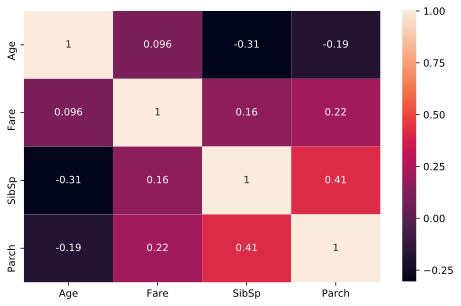

In [60]:
#Дабы упростить жизнь обозначим перменную с4мя столбцами
#и будем юзать ее в дальнейшем
features = ['Age', 'Fare', 'SibSp', 'Parch'] 
CorMat = df[features].corr()
sns.heatmap(CorMat, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002873BA1FCC0>,
      dtype=object)

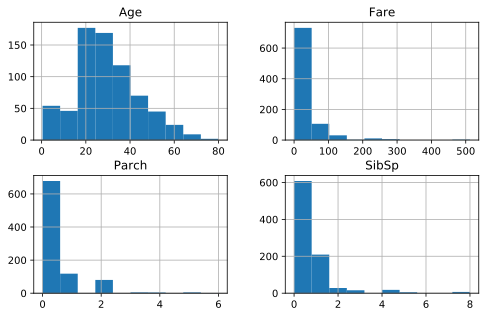

In [61]:
df[features].hist()

In [48]:
sns.pairplot(df[features + ['Survived']], hue='Survived');

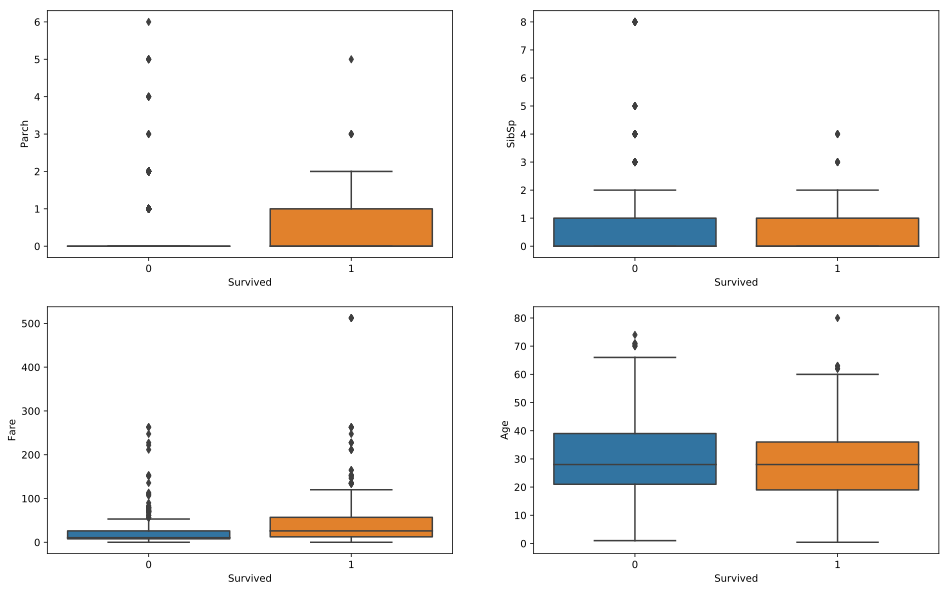

In [64]:
import math
columns = ['Parch', 'SibSp', 'Fare', 'Age']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
for idx, feat in enumerate(columns):
    Ы = math.floor(idx / 2)    
    sns.boxplot(x='Survived', y=feat, data=df, ax=axes[Ы, idx%2])    
    axes[Ы, idx%2].set_xlabel('Survived')
    axes[Ы, idx%2].set_ylabel(feat)

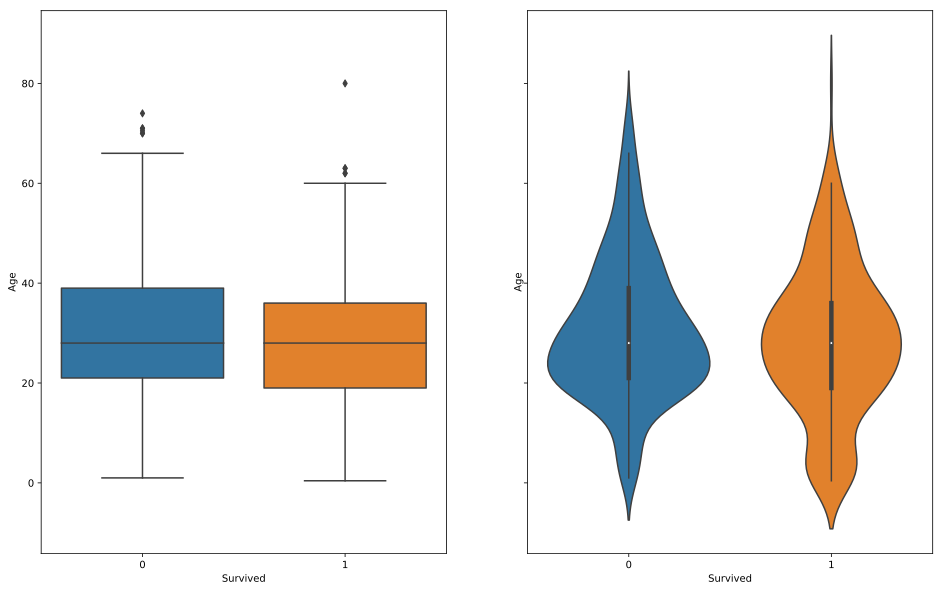

In [54]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,10))
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
sns.violinplot(x='Survived', y='Age', data=df, ax=axes[1])

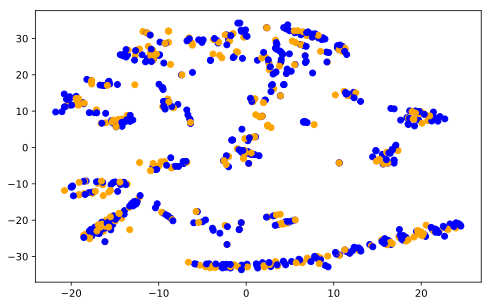

In [67]:
#подглядывание в n-мерное пространство
x = df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
x['Sex'] = pd.factorize(x['Sex'])[0]
x['Embarked'] = pd.factorize(x['Embarked'])[0]
x = x.dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(x_scaled)
plt.figure()
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],
            c=df['Survived'].map({0: 'blue', 1: 'orange'}));